# W241 Final Project 
## Authors: Vivian Lu, Aditi Khullar, Sergio Ferro

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read in all the raw files
first_pilot = pd.read_csv('first_pilot.csv')
second_pilot = pd.read_csv('second_pilot.csv')
control = pd.read_csv('manipulated_data_control_full_dropped.csv')
publicgood = pd.read_csv('manipulated_data_publicgood_full_dropped.csv')
evaluation = pd.read_csv('manipulated_data_evaluation_full_dropped.csv')

# 1.0 Introduction & Motivation

We were motivated in figuring out what makes quality of data collected from crowdsourcing platforms better. We know how important the **quality of human labeled data can be for various supervised machine learning algorithm.**
What we were most interested in exploring was to see **if apart from money, are there other treatments that we can provide to increase the quality of the labeled datasets collected from the crowd.**  

Given that instructions are often present in most of these crowdsourcing platforms, we wondered if altering the instructions with a particular message could encouarge users to put in more effort and try harder on these labelling jobs. 

We used [Figure8](https://www.figure-eight.com/) platform, a highly customizable online tool that can annotate text, images, video, or audio in whatever way is right for your usecase. We chose this platform because: 
1. We have had professional success stories of using this platform for collecting training data
2. We did not want to go with free platform due to lack of availability of responders on these free alternatives
3. Since, this is a paid platform, we wanted to see which treatment beyond payment motivates the responders


# 2.0 Pilot Studies

In order to understand the sorts of questions that we could provide to contributors that would provide enough variation for analysis, we launched 2 pilot studies as we learned what contributors could and could not do on the Figure8 platform.

## 2.1 Pilot 1 

Motivation for Pilot 1: Contributors can easily log into the Figure8 platform to take tests without reading instructions, which would be our form of delivering treatment. Therefore, we launched pilot 1 to understand how likely it was that contributors would actually read instructions. To test this, we placed an 'attention check' within the instructions in addition to a basic set of instructions that would be provided to everyone. 

Specfically, our attention check for pilot 1 asked for contributors to select a specific answer ("Positive") to a question ("This is a lion") if encountered. We define here that a contributor has read instructions by looking to see if they answered this attention check correctly. 

Our first pilot consisted of using short product reviews to be categorized as positive or negative sentiment. We initially chose this dataset due to its simplicity in understanding the English language. Furthermore, product reviews did not seem to need any specific knowledge regarding particular fields. 

*Image 1.0 (below):* Instructions encompassed within Pilot 1

![Pilot 1 screenshot](./images/pilot1.png "Pilot1")


In [3]:
# Number of units (questions) launched
nul = len(first_pilot._unit_id.unique())
nur = len(first_pilot._worker_id.unique())


**Quick stats about Pilot 1:**

* **Number of questions launched:** 113
* **Total unique responders:** 77
* **Launch date:** Tuesday, March 26, 2019
* **Launch time:** 11pm
* **Completion time:** 7 hours 

### 2.1.1 Data collected by Figure8

Below, we provide all fields collected on the contributors from Figure8 platform

**Field Definitions**


    _unit_id: A unique ID number created by the system for each question
    _created_at: The time the contributor submitted the judgement 
    _golden: This will be "true" if this is a test question, otherwise it is "false"
    _id: A unique ID number generated for this specific judgment
    _missed: This will be "true" if the row is an incorrect judgment on a test question.
    _started_at: The time at which the contributor started working on the judgement
    _tainted: This will be "true" if the contributor has been flagged for falling below the required accuracy.
    _channel: The work channel that the contributor accessed the job through.
    _trust: The contributor's accuracy. 
    _worker_id: A unique ID number assigned to the contributor.
    _country: The country the contributor is from.
    _region: A region code for the area the contributor is from.
    _city: The city the contributor is from.
    _ip: The IP address for the contributor.
    _gold: The correct answer for the test question.

We can use **time of response, trust scores, cities and countries** to check the balances between groups. The **tainted indicator** tells us who was dropped and we can report on their statistics. 


In [4]:
first_pilot.sort_values('_started_at').head(5)

,_unit_id,_created_at,_golden,_id,_missed,_started_at,_tainted,_channel,_trust,_worker_id,_country,_region,_city,_ip,please_select_the_sentiment_feeling_of_the_product_review,1,label,please_select_the_sentiment_feeling_of_the_product_review_gold,text,this_is_a_lion
333,2218243929,3/26/2019 02:25:37,True,4661146712,NaN,3/26/2019 02:24:55,False,clixsense,1.0,44980050,TUR,68,Ankara,94.54.16.1,1,NaN,1,1.0,This is a lion,NaN
362,2218245535,3/26/2019 02:25:37,True,4661146708,NaN,3/26/2019 02:24:55,False,clixsense,1.0,44980050,TUR,68,Ankara,94.54.16.1,1,NaN,1,1.0,This is a lion,NaN
300,2216130240,3/26/2019 02:25:37,True,4661146706,NaN,3/26/2019 02:24:55,False,clixsense,1.0,44980050,TUR,68,Ankara,94.54.16.1,1,NaN,1,1.0,This is a lion,NaN
582,2218246446,3/26/2019 02:25:37,True,4661146711,NaN,3/26/2019 02:24:55,False,clixsense,1.0,44980050,TUR,68,Ankara,94.54.16.1,1,NaN,1,1.0,This is a lion,NaN
686,2218246733,3/26/2019 02:25:37,True,4661146715,NaN,3/26/2019 02:24:55,False,clixsense,1.0,44980050,TUR,68,Ankara,94.54.16.1,1,NaN,1,1.0,This is a lion,NaN


### 2.1.2 Average response time 
We note that on average, contributors spent 13 seconds per question. The minimum time spent on a question was 2 seconds while the maximum time spent on a question was nearly 1.5 minutes. 

In [5]:
first_pilot['_time_to_respond'] = (first_pilot._created_at.apply(lambda x: datetime.strptime(x, "%m/%d/%Y %H:%M:%S"))-first_pilot._started_at.apply(lambda x: datetime.strptime(x, "%m/%d/%Y %H:%M:%S")))/5
first_pilot['_time_to_respond'].describe().reset_index().set_index('index').loc[['min', 'max', 'mean']]


,_time_to_respond
index,
min,0 days 00:00:02.400000
max,0 days 00:01:24.800000
mean,0 days 00:00:13.873684


###  2.1.3 Contributor Countries and Trust distributions

To get a sense of where our population was coming from, we examine their characteristics.

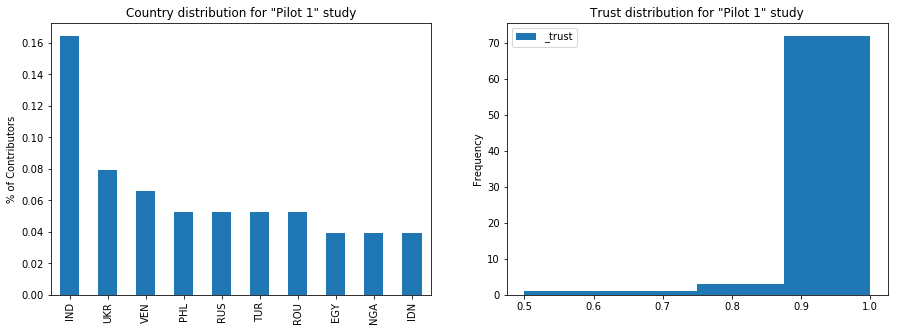

In [59]:
f, axes = plt.subplots(1, 2);
f.set_figheight(5)
f.set_figwidth(15)
country_count  = first_pilot._country.value_counts()
country_count = country_count[:10,]/first_pilot.shape[0]
country_count.plot(kind='bar', ax=axes[0]);
axes[0].set_title('Country distribution for "Pilot 1" study')
axes[0].set_ylabel('% of Contributors')
trust_per_worker  = first_pilot[['_trust', '_worker_id']].groupby('_worker_id').mean();
trust_per_worker.plot(kind='hist', bins = 4, ax=axes[1]);
axes[1].set_title('Trust distribution for "Pilot 1" study')
plt.show()

Since the pilot was launched at 11:00 pm EST, most of the contributors came from the country which are in +5GMT
We saw about 16% of the contributors in pilot 1 coming from India

Most of the contributors were high trust contributors, in which "trust" was a metric gauging how "trustworthy" a contributor was based on their previous performances on other tests. It is unknown how Figure8 decides the trust value of contributors, but it should be noted that test administrators (such as ourselves) do not have access to this trust metric beforehand. Furthermore, we made sure to turn off the setting in Figure8 that specifies particular channels within specific regions of the world for distribution or any characteristics (such as trust) that could skew our population in any way. Lastly we depict the distribution of our contributors' trust scores, indicating that most of them were of fairly high trust scores. We will continue to show the distribution of the contributors' trust values to make sure that experiment results will not be biased due to weaker contibutors.

### 2.1.4 Scores

Scores are defined as the percentage of correctly answered questions for each contributor. In order to detect an effect, we needed to ensure a certain amount of variation in the scores by our contributors. 

In [29]:
# for each worker, find their scores 
workers = list(first_pilot['_worker_id'].unique())
pct_correct = []
for w in workers: 
    subdf=first_pilot[first_pilot['_worker_id']==w]
    correct=len(subdf[subdf['please_select_the_sentiment_feeling_of_the_product_review']==subdf['label']])/len(subdf)*100
    pct_correct.append(correct)

pilot1_scores=pd.DataFrame([workers, pct_correct]).T
pilot1_scores.columns=['workers','scores']


In [31]:
pilot1_scores.describe().round(decimals=2)

,workers,scores
count,77.00,77.00
mean,39883889.09,96.49
std,8159923.44,7.39
min,6342275.00,70.00
25%,38198526.00,100.00
50%,44094454.00,100.00
75%,45020428.00,100.00
max,45190390.00,100.00


We can observe that the lowest score obtained in the sentiment analysis questions in Pilot 1 was 70% while a majority of the contributors actually scored everything correctly. 

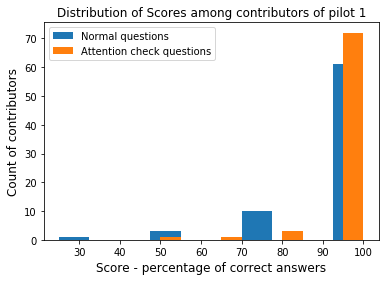

In [6]:
first_pilot['correct_pct'] = 100*first_pilot.label*first_pilot.please_select_the_sentiment_feeling_of_the_product_review \
                        + 100*(1-first_pilot.label)*(1-first_pilot.please_select_the_sentiment_feeling_of_the_product_review)

fp_sbs_norm = first_pilot[first_pilot._golden == False].groupby('_worker_id').mean() #Group by normal questions and get the means.
fp_sbs_comp = first_pilot[first_pilot._golden == True].groupby('_worker_id').mean() #Group by normal questions and get the means.
fp_sbs_norm.correct_pct.hist(label = "Normal questions");
fp_sbs_comp.correct_pct.hist(label = "Attention check questions");
plt.title('Distribution of Scores among contributors of pilot 1')
plt.ylabel('Count of contributors', fontsize=12)
plt.xlabel('Score - percentage of correct answers', fontsize=12)
plt.legend()
plt.grid()
plt.show()

### 2.1.5 Lessons learnt

\begin{itemize}
\item **Time of luanch affects the contributor pool** and which part of the world they come from
\item We also noticed that **some workers only got compliance questions**, hence:
    \begin{itemize}
        \item we randomised the units before upoading to the platform for subsequent experiments
        \item included compliance answers when scoring accuracy of a contributor
    \end{itemize}
\item **Almost everyone got compliance right**, that meant they all read the instructions OR they just thought it is indeed a positive experience to see a lion. 
\item **Our questions were too easy**, as seen by the average score of the workers (93%). Indicating that we don't have too much room for improvement using the treatments. 
\item We were not satisfied but contibutors were!!!
![Pilot 1 Satisfaction screenshot](./images/satisfaction_pilot1.png "satisfaction_Pilot1")
\end{itemize}

## Pilot 2 

![Pilot 2 screenshot](./images/pilot2.png "Pilot2")


In [10]:
# Number of units launched
nul2 = len(second_pilot._unit_id.unique())
nur2 = len(second_pilot._worker_id.unique())

\begin{itemize}
\item **Compliance:** In order to check whether responders read the instructions we asked responders to choose **Yes** for a chameleon picture and write **"This is a lion"** in the text box that pops up
\item **Number of units launched:** 108
\item **Total unique responders:** 34
\item **Launch date:** Wednesday, March 27, 2019
\item **Launch time:** 7pm
\item **Completion time:** 4 hours 
\end{itemize}

### Data Collected

In [11]:
second_pilot.sort_values('_started_at').head(5)

,_unit_id,_created_at,_golden,_id,_missed,_started_at,_tainted,_channel,_trust,_worker_id,...,_region,_city,_ip,animal_present,animal_types,other_animal_type,animal_present_gold,animal_types_gold,image_url,other_animal_type_gold
364,2220961025,3/27/2019 23:46:05,True,4666137441,NaN,3/27/2019 23:45:07,False,clixsense,1.0,44591122,...,NaN,NaN,94.131.215.9,yes,NaN,NaN,yes,NaN,https://i.imgur.com/BhjGxoc.png,NaN
489,2220962052,3/27/2019 23:46:05,True,4666137450,NaN,3/27/2019 23:45:07,False,clixsense,1.0,44591122,...,NaN,NaN,94.131.215.9,no,NaN,NaN,no,NaN,https://i.imgur.com/slPMbss.png,NaN
301,2220960834,3/27/2019 23:46:05,True,4666137452,NaN,3/27/2019 23:45:07,False,clixsense,1.0,44591122,...,NaN,NaN,94.131.215.9,yes,NaN,NaN,yes,NaN,https://i.imgur.com/X8UsZgs.png,NaN
332,2220960987,3/27/2019 23:46:05,True,4666137447,NaN,3/27/2019 23:45:07,False,clixsense,1.0,44591122,...,NaN,NaN,94.131.215.9,no,NaN,NaN,no,NaN,https://i.imgur.com/1q731DL.png,NaN
459,2220961402,3/27/2019 23:46:05,True,4666137444,NaN,3/27/2019 23:45:07,False,clixsense,1.0,44591122,...,NaN,NaN,94.131.215.9,yes,NaN,NaN,yes,NaN,https://i.imgur.com/SMlFTQ6.png,NaN


Very similar to what we saw in Pilot 1

### Average response time

In [12]:
second_pilot['_time_to_respond'] = (second_pilot._created_at.apply(lambda x: datetime.strptime(x, "%m/%d/%Y %H:%M:%S"))-second_pilot._started_at.apply(lambda x: datetime.strptime(x, "%m/%d/%Y %H:%M:%S")))/5
second_pilot['_time_to_respond'].describe().reset_index().set_index('index').loc[['min', 'max', 'mean']]

,_time_to_respond
index,
min,0 days 00:00:02.400000
max,0 days 00:01:20
mean,0 days 00:00:16.027522


Mean time to respond per question was 3 seconds higher than pilot 1. Tougher questions does seem to make responders take more time.

### Contributor Countries and Trust distribution

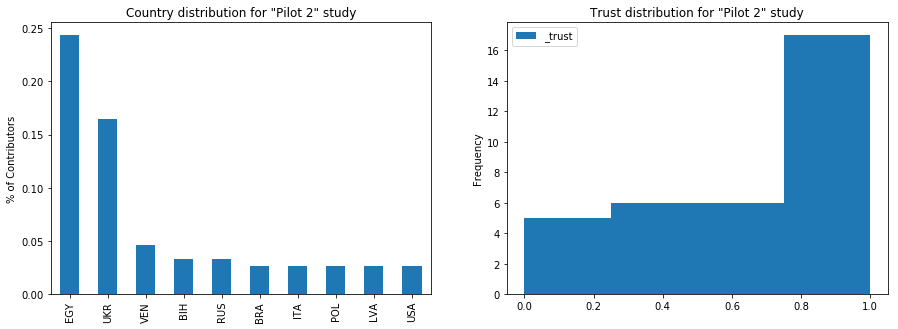

In [60]:
f, axes = plt.subplots(1, 2);
f.set_figheight(5)
f.set_figwidth(15)
country_count  = second_pilot._country.value_counts()
country_count = country_count[:10,]/first_pilot.shape[0]
country_count.plot(kind='bar', ax=axes[0]);
axes[0].set_title('Country distribution for "Pilot 2" study')
axes[0].set_ylabel('% of Contributors')
trust_per_worker  = second_pilot[['_trust', '_worker_id']].groupby('_worker_id').mean();
trust_per_worker.plot(kind='hist', bins = 4, ax=axes[1]);
axes[1].set_title('Trust distribution for "Pilot 2" study')
plt.show()

India is off the charts, and the highest number of responders (25%) seem to be coming from Egypt

Trust of the contributors for pilot 2 was more distributed with about 20% of the responders lying below 50% trust score. We did not pay to much attention to this because the sample size of the responders were too small for us to say anything with much statistical significance.

### Scores

We could not get the lables for the pilot 2 study, hence we dont have score distribution

### Study Satisfaction

![Pilot 2 Satisfaction screenshot](./images/satisfaction_pilot2.png "satisfaction_Pilot2")

## Pilot 1 vs Pilot 2

### Agreement among responders - Non Compliance (Normal) Questions 

###### Helps us see the pilot 2 questions were indeed harder than pilot 1

In [15]:
first_pilot_md = pd.read_csv('first_pilot_metadata.csv')
second_pilot_md = pd.read_csv('second_pilot_metadata.csv')
print('First pilot - Normal questions agreement')
print(first_pilot_md[first_pilot_md._golden == False]['please_select_the_sentiment_feeling_of_the_product_review:confidence'].describe())
print()
print('Second pilot - Normal questions agreement')
print(second_pilot_md[second_pilot_md._golden == False]['animal_present:confidence'].describe())
print()

First pilot - Normal questions agreement
count    100.000000
mean       0.943731
std        0.125110
min        0.647100
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: please_select_the_sentiment_feeling_of_the_product_review:confidence, dtype: float64

Second pilot - Normal questions agreement
count    100.000000
mean       0.908733
std        0.158092
min        0.529400
25%        0.876075
50%        1.000000
75%        1.000000
max        1.000000
Name: animal_present:confidence, dtype: float64



We can see here that **agreement in the first pilot was a lot higher**, with everyone agreeing on the same (presumably correct) answer from the first quartile onwards. The average agreement was 94% with a standard deviation of 12.5%. 

Meanwhile, **the second pilot seems a lot harder in terms of people agreeing in a single answer**: the mean agreement drops to 90.8% and full agreement only becomes visible from the 50% quartile onwards. We know that in the first pilot people were extremely accurate, so more disagreement in the second pilot suggests that the change of database changed as intended; given the picture of a camouflaged animal, some people may see it and others won't, and this is were our treatment of making people take their work more seriously for the good or machine learning or because they're aware that they're being watched could have more room to improve performance scores.

### Agreement among responders - Compliance Questions 

In [16]:
print('First pilot - Compliance questions agreement')
print(first_pilot_md[first_pilot_md._golden == True]['please_select_the_sentiment_feeling_of_the_product_review:confidence'].describe())
print()
print('Second pilot - Compliance questions agreement')
print(second_pilot_md[second_pilot_md._golden == True]['animal_present:confidence'].describe())

First pilot - Compliance questions agreement
count    13.000000
mean      0.988431
std       0.013470
min       0.966400
25%       0.979300
50%       1.000000
75%       1.000000
max       1.000000
Name: please_select_the_sentiment_feeling_of_the_product_review:confidence, dtype: float64

Second pilot - Compliance questions agreement
count    8.000000
mean     0.956625
std      0.043806
min      0.865100
25%      0.948000
50%      0.956250
75%      0.989800
max      1.000000
Name: animal_present:confidence, dtype: float64


The compliance question in second study was much harder, saw lesser agreement and as such had higher standard deviation. **We learnt that keeping compliance questions simplistic, will help us distinguish between people who didn’t read the instructions and who just found the question too tough or complicated to answer**


# Main Experimental Setup

## Lessons Learnt

* Questions regarding **images and the subjects within images require more focus** from the contributor, thus allowing for more variation in scoring accuracy from contributors. 
* We chose images of animals as they **do not require any specific knowledge from a particular area of study** and involves **no subjectivity as was needed when tagging the sentiment.**  
* We simplified our questions to reduce potential confusion from contributors. Namely, **we reduced answer choices to simply “Yes” or “No”**, and did not require any input from the contributor regarding the animals they see. 


## Defining ATE

The outcome that we are interested in observing is defined as **the percentage of number of questions that the contributor answered correctly.** 
\begin{equation*}
ATE = Y_1 - Y_0 
\end{equation*}

\begin{equation*}
= \frac{\sum_i(percentage\ of\ correctly\ answered\ question\ in\ treatment)}{\sum{subjects\ in\ treatment}} - \frac{\sum_i(percentage\ of\ correctly\ answered\ question\ in\ control)}{\sum{subjects\ in\ control}} 
\end{equation*}

As Figure8 is a crowdsourcing platform that performs the service of obtaining labels, Figure8 releases a varying number of questions per contributor to get a ‘consensus’ label for the questions released for labelling. As test administrators, we are unable to bypass Figure8’s built-in feature; we are unable to specify a specific number of questions to be delegated out for each contributor. As a result, we do the best that we can and calculate the percentage of correctly answered questions out of all questions that the contributor received.

## Defining Compliance

**Assigned treatment:** is the set of instructions that the contributor will see depending on the specific test that they clicked on.

**Actual treatment received:** is the contributor reading the instructions to receive the treatment (which we want to see the effect of). 

In reality, we are unable to tell if a contributor actually reads the instructions or not. Therefore, to check whether contributors are reading the instructions at all, we asked them to choose "No" as an indication that they see no animal when they see the picture of a snail

**Non compliers:** If a contributor chose "Yes" they see an animal in snail pictures, that meant they did not read the isntructions. Please note: 
* **We kept this consistent across control and both treatments (public good and evaluation)**
* **We increased the font size and changed the color of the animal as well as the expected answer. This was done intentionally to draw attention**

Note that we do have the possibility of **one-sided noncompliance:** 
* Contributors who were in the control group are not given nor offered a treatment (which is in the form of treatment instructions), and there is no way for a contributor in the control group to get a different treatment as the other tests were not provided until another day. 
* Only contributors who were in the treatment groups (publicgood and compliance) could possibly have a chance for noncompliance. 

Our compliance instructions looked like this:

![Compliance screenshot](./images/compliance.png "Compliance")

## Control

![Control screenshot](./images/control.png "Control")

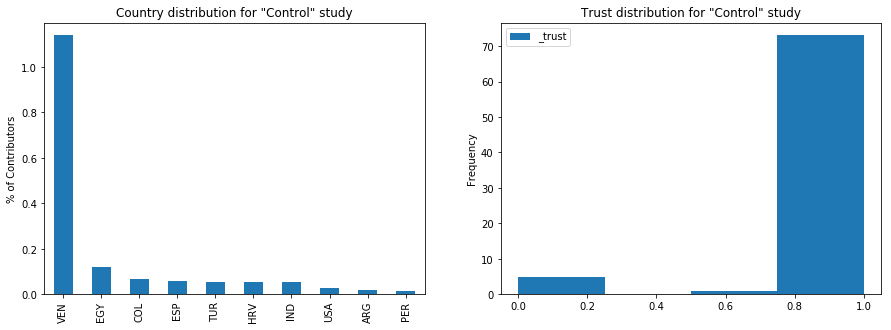

In [63]:
f, axes = plt.subplots(1, 2);
f.set_figheight(5)
f.set_figwidth(15)
country_count  = control._country.value_counts()
country_count = country_count[:10,]/first_pilot.shape[0]
country_count.plot(kind='bar', ax=axes[0]);
axes[0].set_title('Country distribution for "Control" study')
axes[0].set_ylabel('% of Contributors')
trust_per_worker  = control[['_trust', '_worker_id']].groupby('_worker_id').mean();
trust_per_worker.plot(kind='hist', bins = 4, ax=axes[1]);
axes[1].set_title('Trust distribution for "Control" study')
plt.show()

## Treatment 1 - Public Good

![PublicGood 2 screenshot](./images/publicgood.png "Public Good")

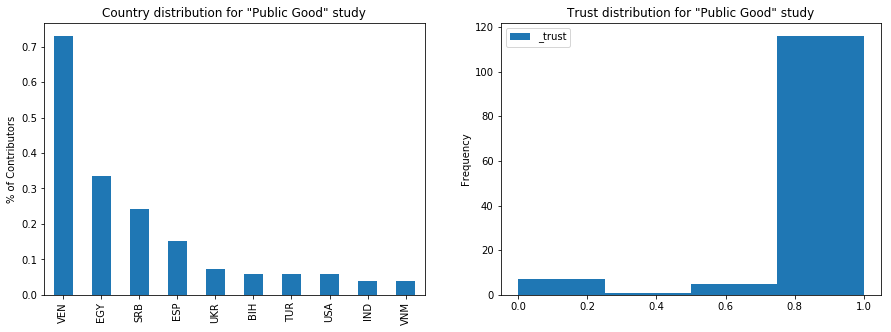

In [57]:
f, axes = plt.subplots(1, 2);
f.set_figheight(5)
f.set_figwidth(15)
country_count  = publicgood._country.value_counts()
country_count = country_count[:10,]/first_pilot.shape[0]
country_count.plot(kind='bar', ax=axes[0]);
axes[0].set_title('Country distribution for "Public Good" study')
axes[0].set_ylabel('% of Contributors')
trust_per_worker  = publicgood[['_trust', '_worker_id']].groupby('_worker_id').mean();
trust_per_worker.plot(kind='hist', bins = 4, ax=axes[1]);
axes[1].set_title('Trust distribution for "Public Good" study')
plt.show()

## Treatment 2 - Evaluation

![Evaluation screenshot](./images/evaluation.png "Evaluation")

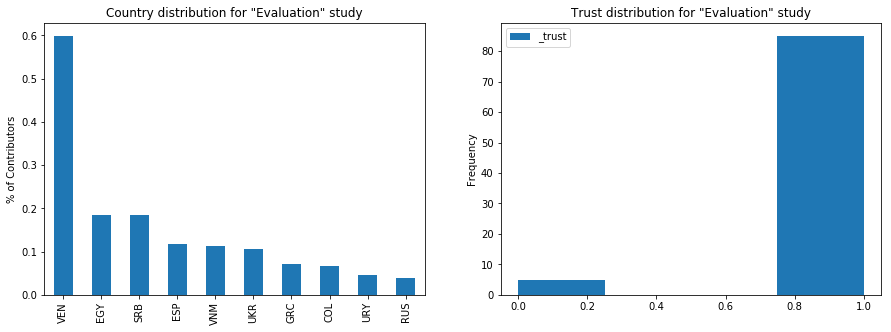

In [64]:
f, axes = plt.subplots(1, 2);
f.set_figheight(5)
f.set_figwidth(15)
country_count  = evaluation._country.value_counts()
country_count = country_count[:10,]/first_pilot.shape[0]
country_count.plot(kind='bar', ax=axes[0]);
axes[0].set_title('Country distribution for "Evaluation" study')
axes[0].set_ylabel('% of Contributors')
trust_per_worker  = evaluation[['_trust', '_worker_id']].groupby('_worker_id').mean();
trust_per_worker.plot(kind='hist', bins = 4, ax=axes[1]);
axes[1].set_title('Trust distribution for "Evaluation" study')
plt.show()

# Assumptions 

## Exclusion restriction

On Green and Gerber’s Field Experiments p. 156, the exclusion restriction is defined as **“A subject’s treatment assignment does not matter once we account for whether a subject is actually treated”.**

As previously defined in section 3.2: 
-	Assignment to treatment is the treatment group the contributor gets selected into based on day. We assume here that **day is independent of potential outcomes;** there should be no reason that a particular day would provide a group of participants that are more or less ‘trustworthy’ than another group on another day. 
-	Treatment received is the set of instructions the contributor receives based on the test that is administered on the day they participate. To actually receive the treatment, the contributor must read the instructions, which we assume is true if the contributor answers the compliance question correctly.  


## Non interference

On Green and Gerber’s Field Experiments p. 155, the non interference assumption is defined as **“potential outcomes for each individual are unaffected by assignment or treatment of any other individuals”.** 

Non-interference should not be a problem for our experiment, as **contributors cannot “discuss” answers or the tests themselves, unless they happen to know each other.** Technically speaking, we won’t know if contributors are actually in communication with each other, but considering how diverse our population is (see section 5 for the number of countries that the individuals are from), it should be that non-interference is a fairly minimal (if any) problem.  


## Non persistence

It should be noted that there is no mechanism on Figure8 that blocks contributors from taking more than 1 test; they are free to select any test that is released on a given day. 

Given that the **tests are fairly short**, and **the average time per test is 13-17 seconds** , we assume non-persistence for contributors who take multiple tests. In other words, there should be **no lingering effect amongst contributors** who take more than 1 test. In an attempt to avoid persistence across tests for repeating contributors, we made sure to space out the 3 experiments throughout the week to avoid contributors possibly ‘remembering’ what the questions were. Furthermore, we provided 232 questions in a test bank; Figure8 picks a subset of questions for the contributor, and thus there is a very high chance of selecting a completely different set of questions for the contributor even if they took more than 1 test. 


# Results

An unanticipated obstacle occurred during our experiment with Figure8 that we had not realized would happen. Previous pilot studies had a fairly small test bank (no more than 50 questions), and therefore the compliance question was made available to everyone. Unfortunately, with 232 questions, Figure 8 did not provide the compliance question to all contributors in all three of our experiment tests that were administered. 

We can see from the chart below (Table 1: Summary statistics for All contributors) that out of 283 total contributors, only 134 contributors received the compliance question. **Roughly half of the people in each treatment group received the compliance question.**

## Summary statistics for All contributors

**Table 1:**
All R code to create metrics for this table will be in the appendix (Section...) 

![Result screenshot](./images/result.png "Result")

We faced a dilemma when deciding how to run analysis and explore our data and results. For those who did not get the compliance question, we had no way of knowing how these contributors would have behaved if they were provided the compliance questions. Essentially, we would never know if these contributors who never received the compliance questions would have truly complied (compliers) or not (never-takers). 

**The biggest fear would be that those who did not get the compliance questions were somehow different in potential outcomes compared to those who did get compliance questions, thus potentially biasing our results if we were to drop them from our analysis (bias due to attrition)** Therefore, we observe the contributors' trust scores--a metric that Figure8 assigns to each contributor as they take tests. We do not know how these trust scores are calculated, but they vary from 0 to 1, with 1 being the highest possible indication of how 'trustworthy' a contributor is (i.e. they will not be the type of contributor that randomly clicks answers just to get payment. We chose to observe the distribution of trust scores amongst those who did and did not get compliance questions to see if Figure8 was intentionally (or unintentionally) giving specific types of people compliance questions. 

From Table 1, we can observe that the average and standard deviation of the trust scores for those who did and did not get compliance questions ('Average Trust' column, with the standard deviations displayed below). **In general, the average and standard deviations within each experiments do not look to differ significantly.**

We can display a histogram of the trust scores amongst those who did/did not receive compliance questions as well (see histogram below). **In general, it looks like the distribution of the trust scores among these 2 groups is fairly similar. There should be no selection bias amongst those who did or did not receive the compliance questions.** 

![Result screenshot](./images/trust_receivedandnotreceivedq_all.png "All_Trust")

Another interesting point of note is that out those who did receive compliance questions within each of our 3 experiments, about **75%** of them did comply (they answered the compliance instruction correctly). 

## Summary statistics for Non repeaters

Another obstacle that appeared within our analysis resulted **repeaters--contributors who took more than 1 test.** Unfortunately, Figure8 does not have a setting that prevents repeat contributors. 

**Table 2**: All R code to produce summary statistics for this table can be found in appendix section (). 

![Result screenshot](./images/nonrepeaters_summary.png "Nonrepeaters")

In Table 2 above, we replicate the same summary statistics as in Table 1, but this time we drop repeaters.

When tabulating repeaters, we noticed the following: 
* 10 contributors took both the control and public good tests. 
* 7 contributors took both the control and evaluation tests. 
* 23 contributors took both the public good and evaluation tests. 

This led to **40 repeaters total.** 

A possible concern would be that these repeaters could have 'learned' the test questions, and therefore improved their scores. We would argue **non-persistence**, as based on the earlier assumptions in this report. **In particular, it is highly unlikely that a repeating contributor would get the exact same set of questions as their previous test given that we provided such a large test bank of 232 questions. Moreover, as mentioned earlier, given that each test was fairly short (less than 1 minute), it is highly unlikely that there is any lingering effect amongst contributors who take more than 1 test.**

Furthermore, for non-persistence, we would like to highlight the following: 
* The number of people (even after dropping the repeaters) who received compliance questions still stays roughly around 50%.
* Average scores and their standard deviations in general do not seem to change much across all 3 experiments even after dropping the repeaters. 
* On average, we still see a 70% compliance rate amongst those who did receive compliance questions. We do see some fluctuations (i.e. in the evaluation group, we see 20 out of the 28 people who received compliance questions answer the compliance question correctly, thus resulting in a 71% compliance rate). However, this change is certainly fairly small. 
* The biggest portion of repeated contributors came from those who repeated both the public good and evaluation tests (both are treatment groups). If these contributors did "learn" from their previous test experience, we would expect repeaters' scores to be higher. By dropping the repeaters to produce the summary stats in Table 2 above, we would expect that the average scores for the public good and evaluation group to be lower than Table 1. We can see, however, that after dropping the repeaters, average scores did not show particular declines across the board for those who did or did not get compliance questions in the public good and evaluation groups. 

Finally, we also check if there is selection bias amongst those who are repeaters. A natural worry is that repeaters are perhaps 'greedy' for money and therefore are not exactly trustworthy contributors. Again, we examine below the histogram of the distribution of trust within our sample after dropping repeaters. Thankfully, it does not look like repeaters came from any particular strata of 'trustworthy' contributors. 

![Result screenshot](./images/trust_receivedandnotreceivedq_nonrepeaters.png "Nonrepeaters")

## 2SLS

We chose 2SLS for our analysis, primarily due to 2 treatment groups (in addition to a control group), with the implication of compliance. A regular OLS would not be sufficient to account for the complications of the proportion of compliers on our treatment effect. 

Based on our exploratory analysis on the summary stats above, **we determined that we would focus on subjects who received compliance questions as we are able to determine whether or not they were true compliers or never takers**. For those who did not receive compliance questions, we do not know whether they would have answered the compliance question correctly if presented. Trust scores are a pre-determined 'metric' provided by Figure8, and this was a metric that was not provided to us beforehand. After observing the trust scores of those who did and did not receive compliance questions, we argue that there should be no differences in potential outcomes amongst those who did and did not receive compliance questions. Therefore, there should not be any selection bias from attrition when contributors who did not receive compliance questions are dropped from our 2SLS regression. 

Dropping those who did not receive compliance questions reduces our sample size from **283 to 134**--a significant decrease, which naturally would impact our potential effect sizes as well. 

It should also be noted that we did not drop repeaters, based on our assumption of non-persistence. 

### 1st Stage

All R code to replicate these regressions can be found in the Appendix section ()

Regress outcome (pct_score) on assigned treatment (group based on day the test was administered).

* Let i designate the individual contributor. 
* Assigned = The treatment group that the contributor was assigned to (based on the day that the test was administered) 
* PercentScore = Percent of correctly answered questions by the individual contributor

$$ PercentScore_i = \beta_0 + \beta_1Assigned_i+u_i $$

![Result screenshot](./images/2sls_1ststage.png "2sls_1ststage")

We can interpret the coefficients as the following: 
* On average, contributors in the control group scored 88.9% with standard error of 1.64% 
* If the contributor was in the evaluation group, on average, they scored 3.79 percentage points lower than control. This can be interpreted as the $\hat{ITT_{eval}}$, or the treatment effect of the evaluation treatment instructions. 
* IF the contributor was in the public good group, on average, they scored 4.53 percentage points lower than control. This can be interpreted as the $\hat{ITT_{publicgood}}$, or the treatment effect of the public good treatment instructions.  

### 2nd Stage

Regress actual treatment on assigned treatment.

The actual treatment (treatment received) is whether or not you read the instructions (which in turn is determined by whether or not you answered the compliance question correctly). 

The assigned treatment is the treatment group based on the day the test was administered. 

* Let i designate the individual contributor. 
* Assigned = The treatment group that the contributor was assigned to (based on the day that the test was administered) 
* Complied = Value of 1 if the contributor received a compliance question AND answered correctly. Value of 0 if the contributor received a compliance question AND answered incorrectly. 

$$ Complied_i = \alpha_0 + \alpha_1Assigned_i + e_i$$

![Result screenshot](./images/2sls_2ndstage.png "2sls_2ndstage")

The coefficients from the 2nd stage of 2SLS are an estimation of our $ITT_d$, or proportion of compliers. 

We can interpret the coefficient as follows: 
* The proportion of compliers in our control group is 0.7567. 
* The evaluation treatment group's proportion of compliers is 0.7567 - 0.0012012 = 0.756 = $\hat{ITT_{d_{eval}}}$
* The public good treatment group's proportio nof compliers is 0.7567 - 0.0067568 = 0.75 = $\hat{ITT_{d_{publicgood}}}$

### CACE

**Point estimate of CACE:**

To get CACE, we divide the individual treatment groups' $\hat{ITT}$ by $\hat{ITT_d}$. 

We can thus calculate a point estimate of CACE as the following: 

$\hat{CACE_{eval}}$ = $\hat{ITT_{eval}}$/$\hat{ITT_{d_{eval}}}$ = -3.798128 / 0.756 = **-5.026934**

$\hat{CACE_{publicgood}}$ = $\hat{ITT_{publicgood}}$/$\hat{ITT_{d_{publicgood}}}$ = -4.531262 / 0.75 =  **-6.041682**

| Group       | Est. CACE   |
|:-----------:|-------------|
| Evaluation  |  -5.026934  |
| Public Good |  -6.041682  |


**Standard Error of CACE:**

To get the standard error of our CACE estimate, we need the standard error of $\hat{ITT}$ divided by $\hat{ITT_d}$. 

In order to obtain a standard error estimate of $\hat{ITT}$, we turn to **randomization inference.** 
* We shuffled the treatment column to randomly assign contributors to different treatment groups. From there, we simulate 10,000 calculations of $\hat{ITT}$ for each treatment group to get a distribution for calculating $SE(\hat{ITT})$. All R code for this can be found in the appendix in section (). 

| Group       | Est.SE(ITT) |
|:-----------:|-------------|
| Evaluation  |  2.917640   |
| Public Good |  2.839172   |


Thus, we can calculate a 95% confidence interval for our estimate of CACE with the ($\hat{CACE}$ - 1.96x$SE(\hat{ITT})$, $\hat{CACE}$ - 1.96x$SE(\hat{ITT})$)

|    Group    | Lower CI    | Upper CI |
|:-----------:|-------------|----------|
| Evaluation  | -9.516682   | 1.920426 |
| Public Good | -10.096039  | 1.033516 |

* In particular, notice just how large this confidence interval is--it is almost 10-11 percentage points. 
* Notice that both confidence intervals for the average treatment effect on both treatment groups contains 0; we are unable to reject the null that CACE is 0 for all subjects. This matches our original regression results in that we did not attain significant results from any treatment group. 

# Caveats 

* English is not a native language for the contributors 
* Time of day can affect treatment effect. Based on time of day whe nthe test was released, this could change which countries' contributors are coming from. 
* Our definition of 'compliance' was based on answering a compliance question incorrectly or correctly. We realize that this is a "proxy" of knowing whether the contributor read the instructions (and thus received the treatment) or not. Understanding the instructions, however, is a completely different story (and thus may have implicated whether a contributor responded to the compliance question correctly or not. Moreover, it is entirely possible that someone answered the compliance question wrong, but continued to answer all other questions attentively. 

# Conclusion 

* It is difficult to encourage people to read instructions 
* We are unable to determine any significant effects from the 2 treatments, suggesting that other than financial incentives, it is difficult to encourage contributors to try harder. 
* On average, it seems like contributors in treatment groups scored lower than control. This possibly suggests that treatment may have confused contributors (i.e. perhaps instructions made the contributors nervous, and hence they made more mistakes). 